
Use TensorFlow Keras & a sample of the [Quickdraw dataset](https://github.com/googlecreativelab/quickdraw-dataset) to build a sketch classification model. The dataset has been sampled to only 10 classes and 10000 observations per class. Please build a baseline classification model then run a few experiments with different optimizers and learning rates. 

*Don't forgot to switch to GPU on Colab!*

## Load Your Data

In [1]:
import numpy as np
import tensorflow as tf 
from io import BytesIO
import requests

# fetch the entire file, create an in-memory file-like object and pass it to np.load
url = 'https://github.com/skhabiri/ML-ANN/raw/main/data/quickdraw10.npz'
r = requests.get(url, stream = True)
data = np.load(BytesIO(r.raw.read()))

print(data.files)

X = data['arr_0']
y = data['arr_1']

print(X.shape)
print(y.shape)

['arr_0', 'arr_1']
(100000, 784)
(100000,)


In [23]:
# !wget url
# !ls

In [2]:
print(type(X[0]))
print(X[0].shape, X[0].max(), X[0].min())
X[0]

<class 'numpy.ndarray'>
(784,) 255 0


array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,  11,  21,  12,   0,   0,   0,   0,   0,   0,   0,
         0,  92,  20,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,  91, 213, 253, 255, 255, 222,  95,   3,   0,   0,
         0,   0,   7, 255, 222,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,  24, 190, 255, 196, 118, 100, 109, 196, 255, 121,
         0,   0,   0,   0,   0, 141,  35,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   1, 185, 241,  94,   1,   0,   0,   0,   0,
        63,  25,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,  89, 255, 115, 133, 150,  37,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0, 207, 241, 252, 25

In [3]:
class_names = ['apple',
 'anvil',
 'airplane',
 'banana',
 'The Eiffel Tower',
 'The Mona Lisa',
 'The Great Wall of China',
 'alarm clock',
 'ant',
 'asparagus']

In [4]:
y[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [5]:
# Need this line to randomly shuffle both the X & y "at the same time".
# To avoid having all the apples at rows 0 to 9999

from sklearn.utils import shuffle
X, y = shuffle(X, y)

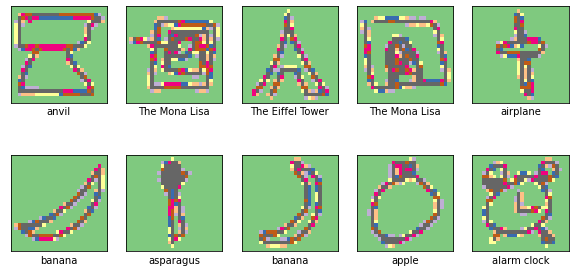

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))

for num in range(10):
    plt.subplot(2,5, num+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[num+50].reshape(28,28), cmap=plt.cm.Accent)
    plt.xlabel(class_names[y[num+50]])
#     start += 1000
plt.show()

## Build Your Baseline Model
Some Hints:


*  Model should have 784 input dimension (like mnist)
*  Use `sparse_categorical_crossentropy` as your loss function.
* You need 10 neurons in your last layer for output
* You can add as many hidden layers with as many neurons in them as you like. 
* Limit your model fit epochs to 30.
* You can use the `validation_split` command to automatically create a training / validation dataset.  Specify a percentage such as .2 in your fit statement. 

In [56]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [57]:
def create_model(lr=.01):
  """
  Stochastic Gradient Descent SGD optimizer
  784+1 * 32+1 * 32+1 * 10
  """
  opt = SGD(learning_rate=lr)

  model = Sequential(
      [
      #  784 inputs + 1 bias connect to 32 1st layer Hiddent neurons
       Dense(32, activation='relu', input_dim=784),
      #  32 1st-H-Neurons + 1 bias connected to 32 2'nd layer H-Neurons
       Dense(32, activation='relu'),
      #  32 2nd-H-neurons connect to 10 Output neurons
       Dense(10, activation='softmax')       
      ]
    )
  model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [58]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


In [60]:
baseline = model.fit(X, y,
                       validation_split=0.2,
                      #Hyperparameters!
                       epochs=20,
                       batch_size=32,
                       )

Epoch 1/20
2500/2500 [==============================] - 2s 726us/step - loss: 2.3024 - accuracy: 0.0994 - val_loss: 2.3029 - val_accuracy: 0.0967
Epoch 2/20
2500/2500 [==============================] - 2s 680us/step - loss: 2.3024 - accuracy: 0.0992 - val_loss: 2.3030 - val_accuracy: 0.0985
Epoch 3/20
2500/2500 [==============================] - 2s 697us/step - loss: 2.3024 - accuracy: 0.0991 - val_loss: 2.3030 - val_accuracy: 0.0986
Epoch 4/20
2500/2500 [==============================] - 2s 668us/step - loss: 2.3024 - accuracy: 0.0995 - val_loss: 2.3030 - val_accuracy: 0.0967
Epoch 5/20
2500/2500 [==============================] - 2s 704us/step - loss: 2.3024 - accuracy: 0.0993 - val_loss: 2.3031 - val_accuracy: 0.0967
Epoch 6/20
2500/2500 [==============================] - 2s 679us/step - loss: 2.3024 - accuracy: 0.0986 - val_loss: 2.3030 - val_accuracy: 0.0967
Epoch 7/20
2500/2500 [==============================] - 2s 673us/step - loss: 2.3024 - accuracy: 0.1002 - val_loss: 2.3030 -

### Visualize the results

Create charts for both loss and accuracy by epoch. Use line graphs for both charts. Analyze the results. 

At what point should we have stopped training the model and why? 

In [61]:
baseline.history

{'loss': [2.3023855686187744,
  2.30241060256958,
  2.3023951053619385,
  2.3024184703826904,
  2.3023955821990967,
  2.3023924827575684,
  2.3023838996887207,
  2.302396535873413,
  2.3023898601531982,
  2.3023934364318848,
  2.3023951053619385,
  2.3024001121520996,
  2.302386999130249,
  2.3023993968963623,
  2.302382707595825,
  2.3023934364318848,
  2.3023979663848877,
  2.3023829460144043,
  2.3023924827575684,
  2.302361249923706],
 'accuracy': [0.09939999878406525,
  0.09920000284910202,
  0.09913749992847443,
  0.0995125025510788,
  0.09925000369548798,
  0.09857500344514847,
  0.10017500072717667,
  0.09882500022649765,
  0.10013750195503235,
  0.10123749822378159,
  0.09884999692440033,
  0.09925000369548798,
  0.09987500309944153,
  0.09911250323057175,
  0.1003125011920929,
  0.10057500004768372,
  0.09907499700784683,
  0.09889999777078629,
  0.10074999928474426,
  0.1006999984383583],
 'val_loss': [2.302858829498291,
  2.3029747009277344,
  2.30298113822937,
  2.30300164

,accuracy,loss,val_accuracy,val_loss,epoch
0,0.099400,2.302386,0.09670,2.302859,0
1,0.099200,2.302411,0.09855,2.302975,1
2,0.099137,2.302395,0.09860,2.302981,2
3,0.099513,2.302418,0.09670,2.303002,3
4,0.099250,2.302396,0.09670,2.303054,4
5,0.098575,2.302392,0.09670,2.303006,5
6,0.100175,2.302384,0.09670,2.302996,6
7,0.098825,2.302397,0.09900,2.303015,7
8,0.100138,2.302390,0.09975,2.303078,8
9,0.101237,2.302393,0.09670,2.303094,9


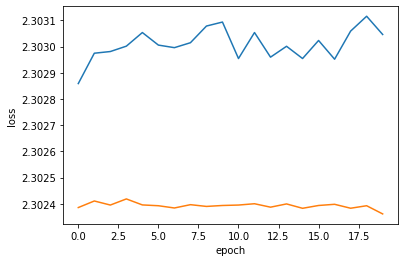

In [63]:
import seaborn as sns
import pandas as pd

df = pd.DataFrame.from_records(baseline.history)
df['epoch'] = [i for i in range(df.shape[0])]
# df['epoch'] = df.index.values

ax = sns.lineplot(x='epoch', y='val_loss', data=df)
ax = sns.lineplot(x='epoch', y='loss', data=df);
df

## Change Optimizers
Try using the keras `adam` optimizer instead of `sgd` in your model. Visualize the difference in validation loss between the models with different optimizers. 

In [64]:
from tensorflow.keras.optimizers import Adam
adam = Adam(learning_rate=0.01)

model_adam = Sequential(
      [
      #  784 inputs + 1 bias connect to 32 1st layer Hiddent neurons
       Dense(32, activation='relu', input_dim=784),
      #  32 1st-H-Neurons + 1 bias connected to 32 2'nd layer H-Neurons
       Dense(32, activation='relu'),
      #  32 2nd-H-neurons connect to 10 Output neurons
       Dense(10, activation='softmax')       
      ]
    )

model_adam.compile(optimizer=adam, loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

model_adam.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


In [65]:
adam_opt = model_adam.fit(X, y,
                       validation_split=0.2,
                      #Hyperparameters!
                       epochs=20,
                       batch_size=32,
                       )

Epoch 1/20
2500/2500 [==============================] - 3s 875us/step - loss: 4.6352 - accuracy: 0.3840 - val_loss: 1.4536 - val_accuracy: 0.4291
Epoch 2/20
2500/2500 [==============================] - 2s 763us/step - loss: 1.5347 - accuracy: 0.4293 - val_loss: 1.6075 - val_accuracy: 0.4448
Epoch 3/20
2500/2500 [==============================] - 2s 756us/step - loss: 1.6458 - accuracy: 0.3815 - val_loss: 1.7542 - val_accuracy: 0.3490
Epoch 4/20
2500/2500 [==============================] - 2s 765us/step - loss: 1.8031 - accuracy: 0.2970 - val_loss: 1.9979 - val_accuracy: 0.1864
Epoch 5/20
2500/2500 [==============================] - 2s 767us/step - loss: 2.0051 - accuracy: 0.1865 - val_loss: 1.9677 - val_accuracy: 0.1901
Epoch 6/20
2500/2500 [==============================] - 2s 763us/step - loss: 2.0172 - accuracy: 0.1875 - val_loss: 2.0089 - val_accuracy: 0.1831
Epoch 7/20
2500/2500 [==============================] - 2s 766us/step - loss: 1.9930 - accuracy: 0.1875 - val_loss: 2.0414 -

In [66]:
optimizers = []

for exp, result in zip([baseline, adam_opt], ["sgd", "adam"]):
  # .history gets loss, accuracy, validation loss and validation accuracy
  df = pd.DataFrame.from_dict(exp.history)
  df['epoch'] = df.index.values
  df['opt'] = result

  optimizers.append(df)

In [67]:
df = pd.concat(optimizers, axis=0)
df['opt'] = df['opt'].astype('str')
df

,loss,accuracy,val_loss,val_accuracy,epoch,opt
0,2.302386,0.099400,2.302859,0.09670,0,sgd
1,2.302411,0.099200,2.302975,0.09855,1,sgd
2,2.302395,0.099137,2.302981,0.09860,2,sgd
3,2.302418,0.099513,2.303002,0.09670,3,sgd
4,2.302396,0.099250,2.303054,0.09670,4,sgd
5,2.302392,0.098575,2.303006,0.09670,5,sgd
6,2.302384,0.100175,2.302996,0.09670,6,sgd
7,2.302397,0.098825,2.303015,0.09900,7,sgd
8,2.302390,0.100138,2.303078,0.09975,8,sgd
9,2.302393,0.101237,2.303094,0.09670,9,sgd


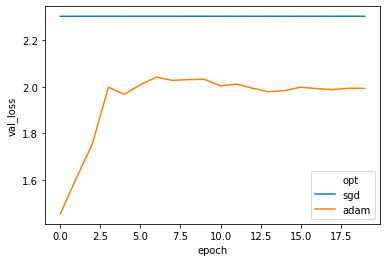

In [68]:
sns.lineplot(x='epoch', y='val_loss', hue='opt', data=df);

### Additional Written Tasks:
In this section, you will need to search for resources: 
1. Investigate the various [loss functions](https://www.tensorflow.org/api_docs/python/tf/keras/losses). Which is best suited for the task at hand (predicting 1 / 0) and why? 
2. What is the difference between a loss function and a metric? Why might we need both in Keras? 
3. Investigate the various [optimizers](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers). Stochastic Gradient Descent (`sgd`) is not the learning algorithm dejour anyone. Why is that? What do newer optimizers such as `adam` have to offer? 

## Stretch Goals: 

- Research convolutional neural networks and try including convolution layers in your network.
- Pick two classes and make QuickDraw a binary classification problem, how does your model architecture change?
- Implement Cross Validation model evaluation on your Quickdraw implementation 

Watch some more videos on Gradient Descent:
- [Gradient Descent, Step-by-Step](https://www.youtube.com/watch?v=sDv4f4s2SB8)  by StatQuest w/ Josh Starmer. This will help you understand the gradient descent based optimization that happens underneath the hood of neural networks. It uses a non-neural network example, which I believe is a gentler introduction. You will hear me refer to this technique as "vanilla" gradient descent. 
- [Stochastic Gradient Descent, Clearly Explained!!!](https://www.youtube.com/watch?v=vMh0zPT0tLI) by StatQuest w/ Josh Starmer. This builds on the techniques in the previous video.  This technique is the one that is actually implemented inside modern 'nets. 
- [Siraj Raval the evolution of gradient descent](https://www.youtube.com/watch?v=nhqo0u1a6fw)